In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [12]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

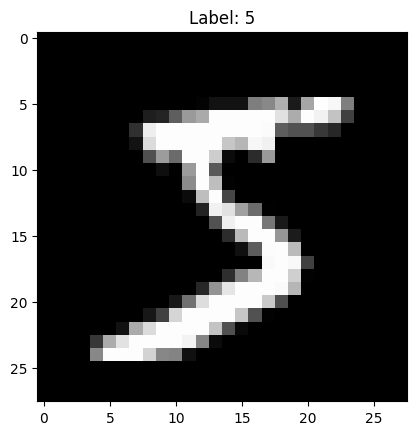

In [13]:
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

In [14]:
x_train = x_train/255.0
x_test = x_test/255.0

In [15]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [16]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
model.fit(x_train, y_train_cat, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8652 - loss: 0.4576 - val_accuracy: 0.9697 - val_loss: 0.1045
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9662 - loss: 0.1116 - val_accuracy: 0.9740 - val_loss: 0.0834
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9780 - loss: 0.0694 - val_accuracy: 0.9770 - val_loss: 0.0829
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9838 - loss: 0.0497 - val_accuracy: 0.9788 - val_loss: 0.0687
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9869 - loss: 0.0393 - val_accuracy: 0.9788 - val_loss: 0.0811


In [19]:
loss, accuracy = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9726 - loss: 0.0917
Test Accuracy: 0.9755


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


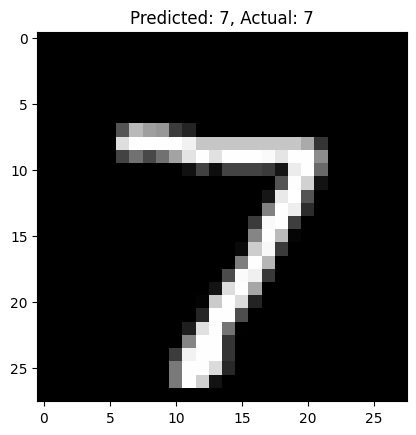

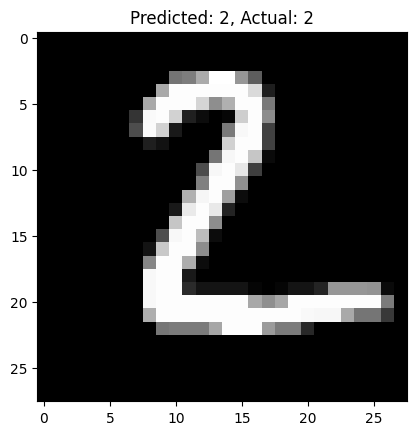

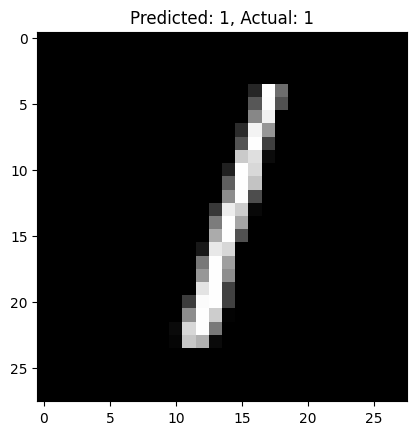

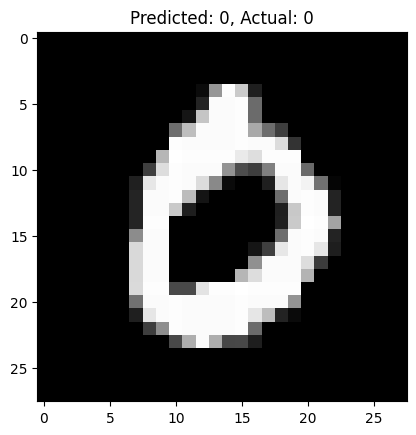

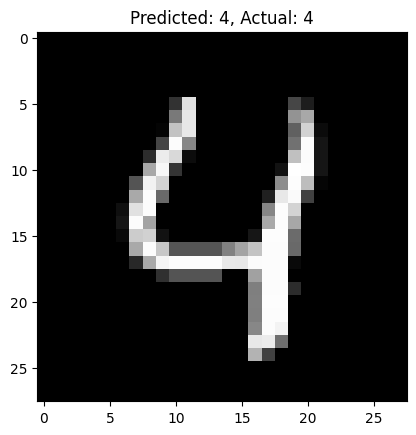

In [20]:
predictions = model.predict(x_test)

for i in range(5):
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}, Actual: {y_test[i]}")
    plt.show()
